In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(color_codes=True)

# univariate distributions

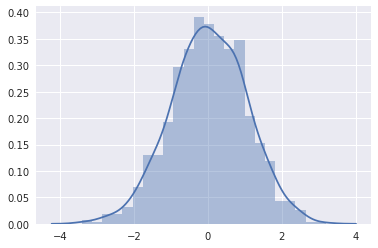

In [4]:
sns.distplot(np.random.normal(size=(1000,)))

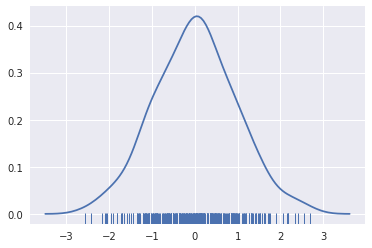

In [5]:
sns.distplot(np.random.normal(size=(300,)), hist=False, kde=True, rug=True)

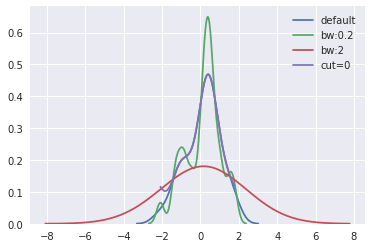

In [6]:
x = np.random.normal(size=(30,))
sns.kdeplot(x, shade=False, label='default')
sns.kdeplot(x, bw=0.2, label='bw:0.2')
sns.kdeplot(x, bw=2, label='bw:2')
sns.kdeplot(x, cut=0, label='cut=0')
plt.legend()

# Bivariate distributions

In [7]:
mean = [0,1]
cov = [(1,0.5), (0.5,1)]
x,y = np.random.multivariate_normal(mean, cov, 200).T

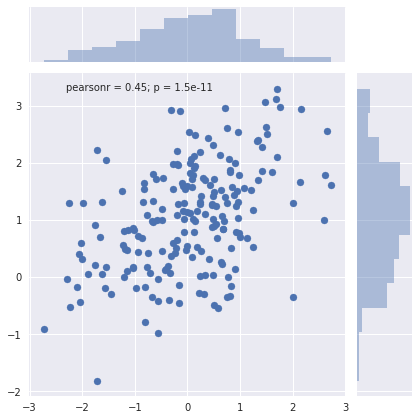

In [8]:
# scatter is not good for large number of data
sns.jointplot(x, y)

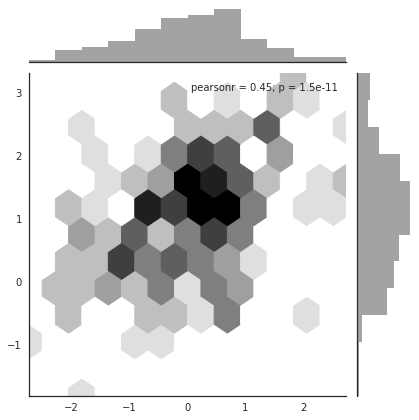

In [9]:
# fit for large number of data
with sns.axes_style('white'):
    sns.jointplot(x, y, kind='hex', color='k')

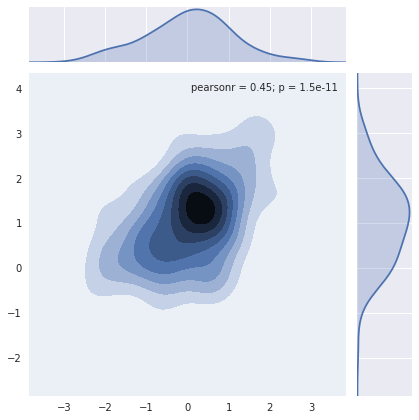

In [10]:
sns.jointplot(x, y, kind='kde')

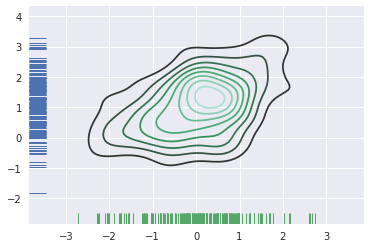

In [11]:
hFig, ax = plt.subplots()
sns.kdeplot(x, y, ax=ax)
sns.rugplot(x, color='g', ax=ax)
sns.rugplot(y, vertical=True, ax=ax)

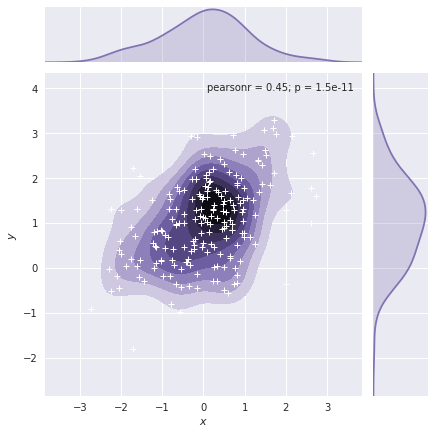

In [12]:
g = sns.jointplot(x, y, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$x$','$y$')

# pairwise relationships

<class 'pandas.core.frame.DataFrame'>


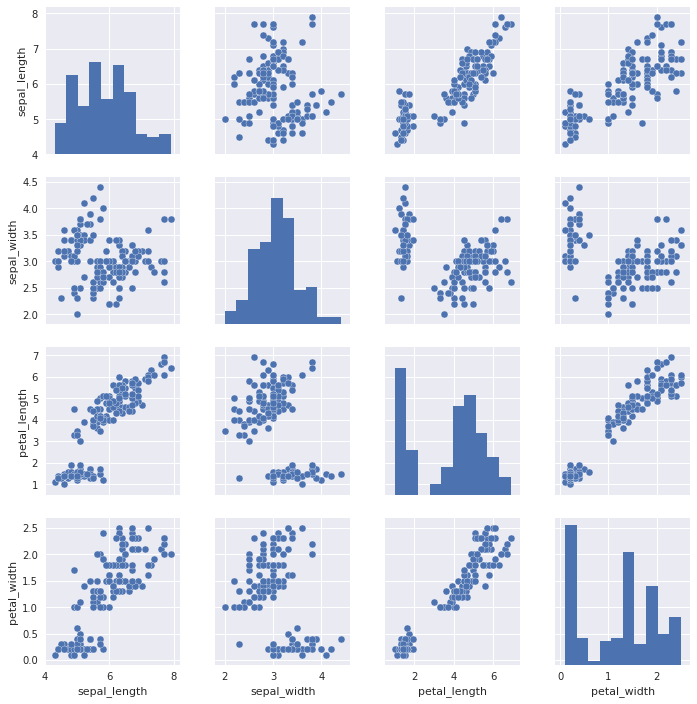

In [13]:
iris = sns.load_dataset('iris')
print(type(iris))
sns.pairplot(iris)

/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/husisy/miniconda3/envs/python3_cpu/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: T

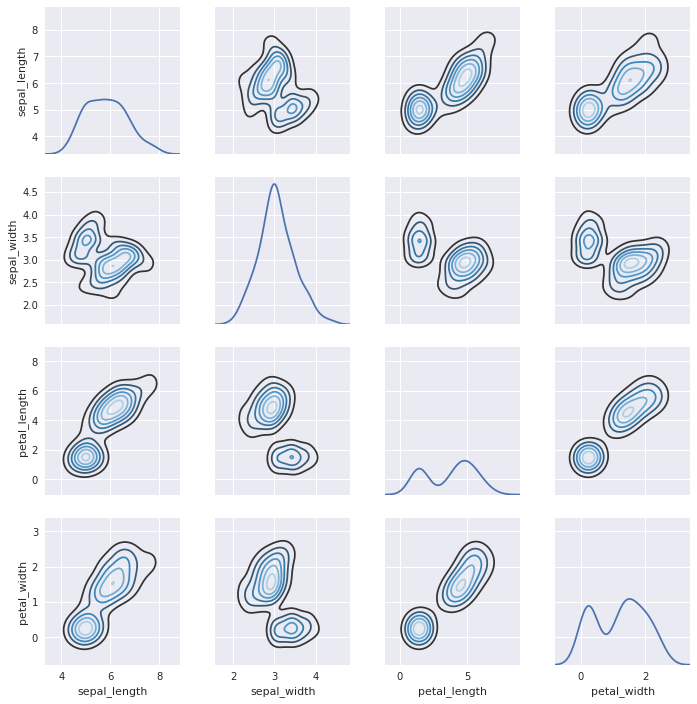

In [15]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=6)

# Categorical data

In [15]:
sns.set(style='whitegrid', color_codes=True)

In [19]:
import os
titanic = pd.read_csv(os.path.join('seaborn_data','titanic.csv'))
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

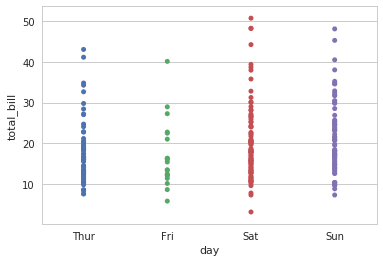

In [20]:
sns.stripplot(tips.day, tips.total_bill)

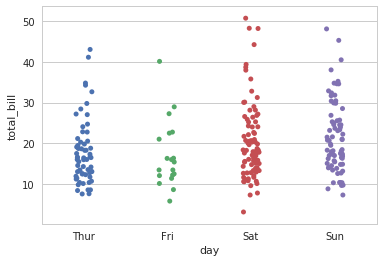

In [21]:
sns.stripplot(tips.day, tips.total_bill, jitter=True)

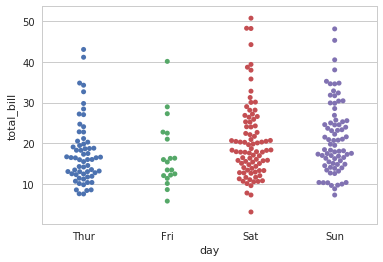

In [23]:
sns.swarmplot(tips.day, tips.total_bill)

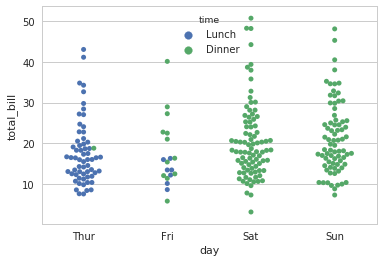

In [34]:
sns.swarmplot(x=tips.day, y=tips.total_bill, hue=tips.time)

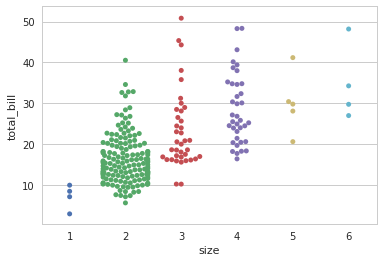

In [32]:
sns.swarmplot(x=tips.loc[:,'size'], y=tips.total_bill)

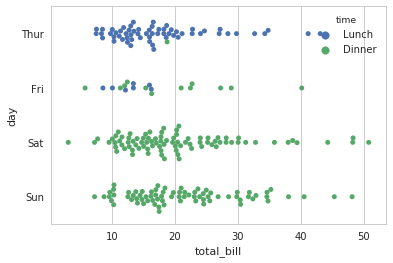

In [33]:
sns.swarmplot(x=tips.total_bill, y=tips.day, hue=tips.time)

# Distributions of observation within categories

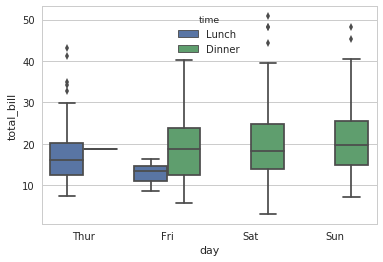

In [35]:
sns.boxplot(x=tips.day, y=tips.total_bill, hue=tips.time)

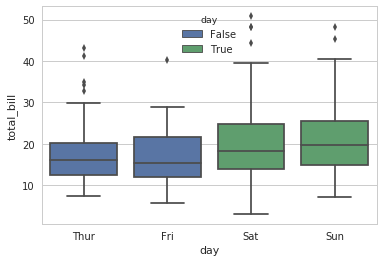

In [36]:
sns.boxplot(x=tips.day, y=tips.total_bill, hue=tips['day'].isin(['Sat','Sun']), dodge=False)

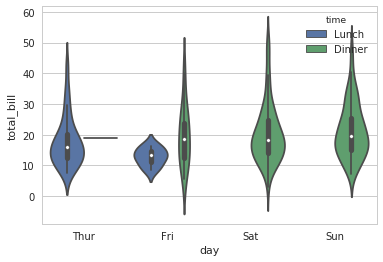

In [39]:
sns.violinplot(tips.day, tips.total_bill, hue=tips.time)

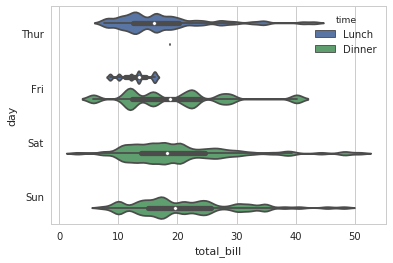

In [41]:
sns.violinplot(tips.total_bill, tips.day, hue=tips.time, bw=0.1, scale='count', scalue_hue=False)

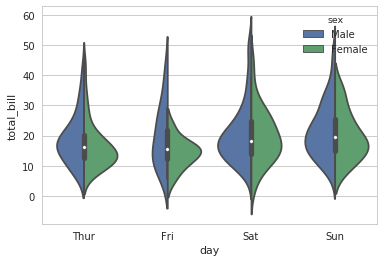

In [42]:
sns.violinplot(tips.day, tips.total_bill, hue=tips.sex, split=True)

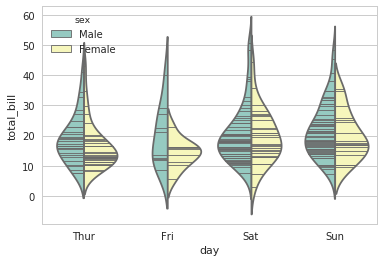

In [44]:
sns.violinplot(tips.day, tips.total_bill, hue=tips.sex,
               split=True, inner='stick', palette='Set3')

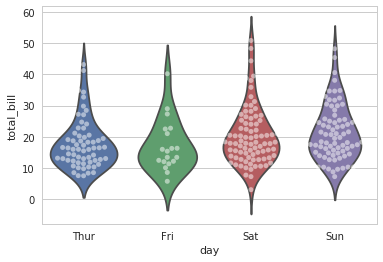

In [45]:
sns.violinplot(tips.day, tips.total_bill, inner=None)
sns.swarmplot(tips.day, tips.total_bill, color='w', alpha=0.5)

# Statistical estimation within categories

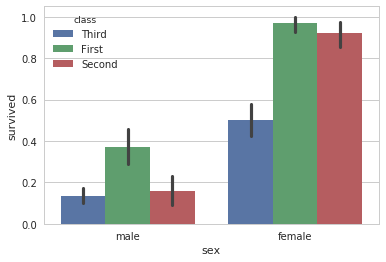

In [52]:
sns.barplot(titanic.sex, titanic.survived, hue=titanic['class'])

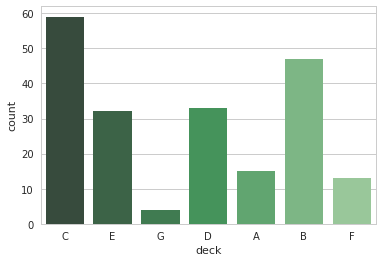

In [53]:
sns.countplot(titanic.deck, palette='Greens_d')

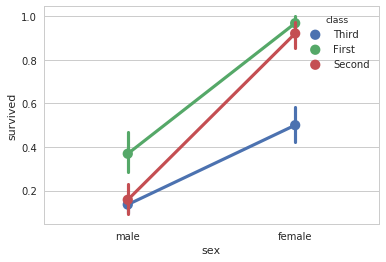

In [54]:
sns.pointplot(titanic.sex, titanic.survived, hue=titanic['class'])

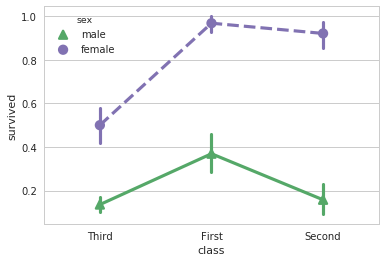

In [55]:
sns.pointplot(titanic['class'], titanic.survived, hue=titanic.sex,
        palette={'male':'g','female':'m'}, markers=['^','o'], linestyles=['-','--'])

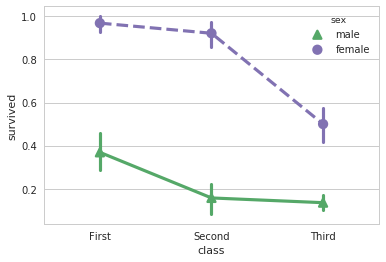

In [57]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
    order = ['First','Second','Third'], palette={'male':'g','female':'m'},
    markers=['^','o'], linestyles=['-','--'])